In [52]:
import networkx as nx
from synutility.SynIO.data_type import load_from_pickle

In [8]:
data = load_from_pickle("/home/mark/Documents/graph_theory/ITS_graphs.pkl.gz")

In [53]:
len(data)

34395

In [59]:
set_of_reactions = data

In [60]:
def get_reaction_center(its_graph):
    reaction_center_edges = [edge for edge in its_graph.edges.data() if edge[2]["standard_order"] != 0]

    reaction_center_nodes = set()

    for start_node, end_node, order_info in reaction_center_edges:
        reaction_center_nodes.add(start_node)
        reaction_center_nodes.add(end_node)

    return nx.induced_subgraph(its_graph, reaction_center_nodes)


In [61]:
def simple_clustering(em = None, nm = None):
    partitions = []

    for reaction in set_of_reactions:
        
        partition_could_be_found = False
        reaction_its = reaction["ITS"]

        for partition in partitions:
            partition_representant = partition[0]

            rc_reaction = get_reaction_center(reaction_its)
            rc_partition_representant = get_reaction_center(partition_representant)

            if nx.is_isomorphic(rc_reaction, rc_partition_representant, edge_match=em, node_match=nm):
                partition.append(reaction_its)
                partition_could_be_found = True
                break

        if not partition_could_be_found:
            partitions.append([reaction_its])

    return partitions


In [62]:
partitions = simple_clustering()

for index, p in enumerate(partitions):
    if len(p) != 1:
        print(index)


current_partition = partitions[0]
current_partition


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
37
38
39
40
42
43
44
45
46
49
53
54
57
58


 ...]

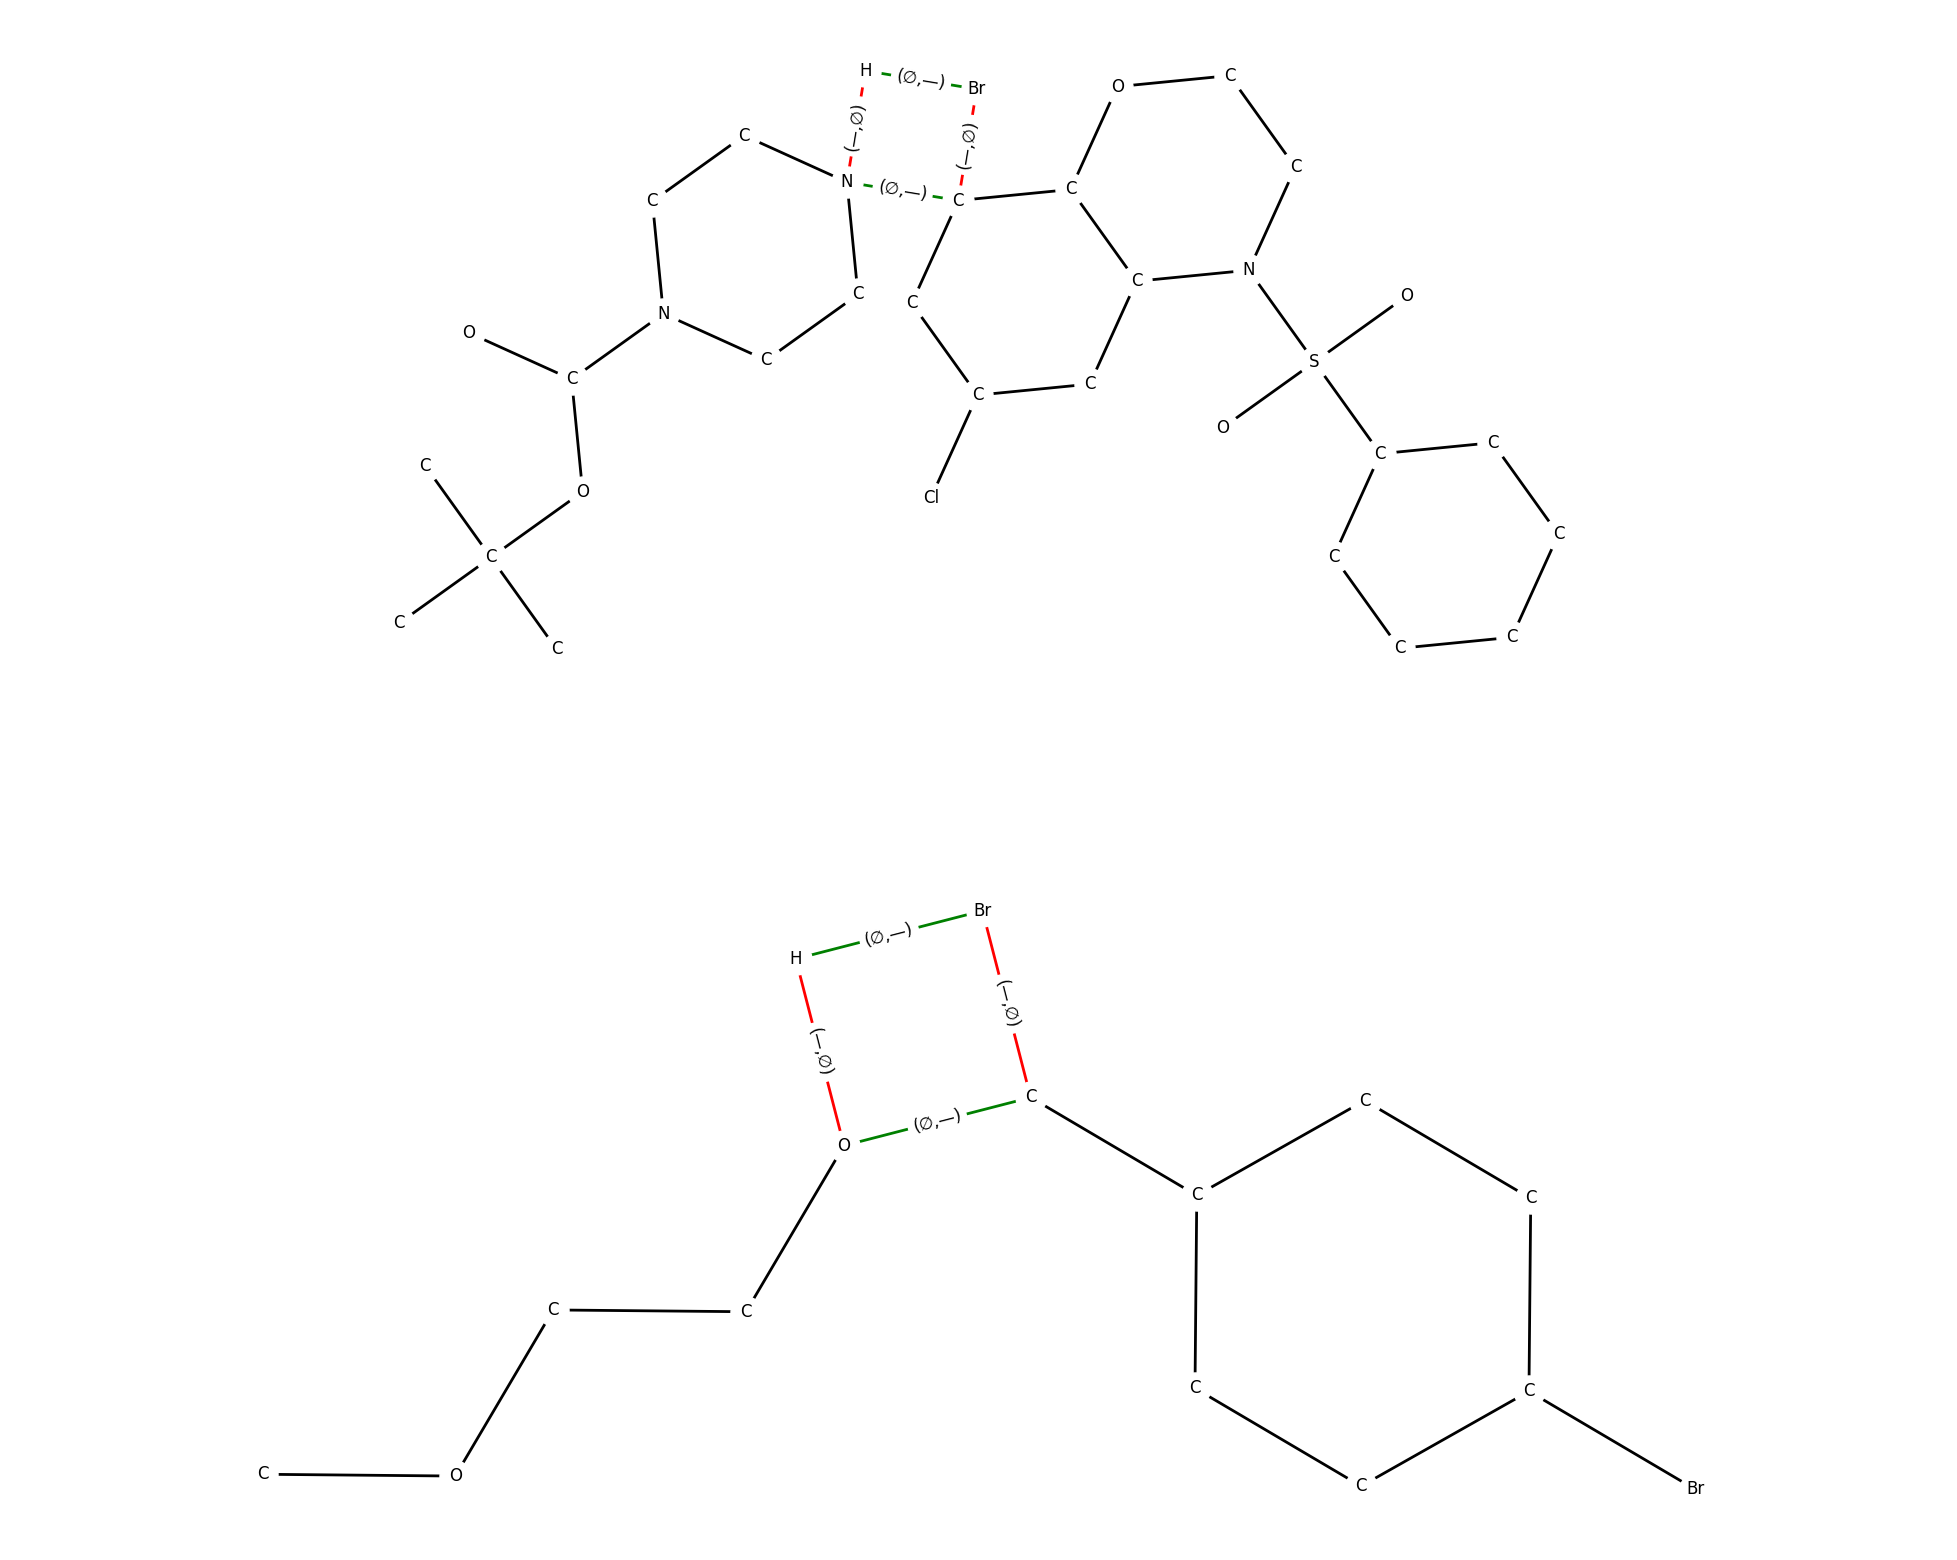

In [63]:
from synutility.SynVis.graph_visualizer import GraphVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize = (25, 20 ))
vis = GraphVisualizer ()

vis.plot_its(current_partition[0], ax[0], use_edge_color=True)
vis.plot_its(current_partition[1], ax[1], use_edge_color=True)

In [64]:
import networkx.algorithms.isomorphism as iso

from operator import eq
from math import isclose
from networkx.algorithms.isomorphism import generic_node_match, numerical_edge_match

nm = generic_node_match(["charge", "element"], [0, "H"], [isclose, eq])

# TODO: Perhabs this edge match function is not correct because the instruction says we should use order 
# instead of standard order here
# but order is a tuple and it is not clear how tuples should be compared
em = iso.numerical_edge_match("standard_order", 0)

partitions = simple_clustering(nm=nm, em=em)

In [65]:
for index, p in enumerate(partitions):
    if len(p) != 1:
        print(index)


current_partition = partitions[0]
current_partition

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
145
146
147
148
149
150
151
152
154
155
156
157
158
159
161
163
164
165
166
167
168
169
170
171
172
173
174
175
176
178
179
181
182
183
184
185
186
187
189
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
216
218
219
220
222
223
224
225
228
230
232
234
239
240
247
249
250
252
254
255
269
271
290
292


 ...]

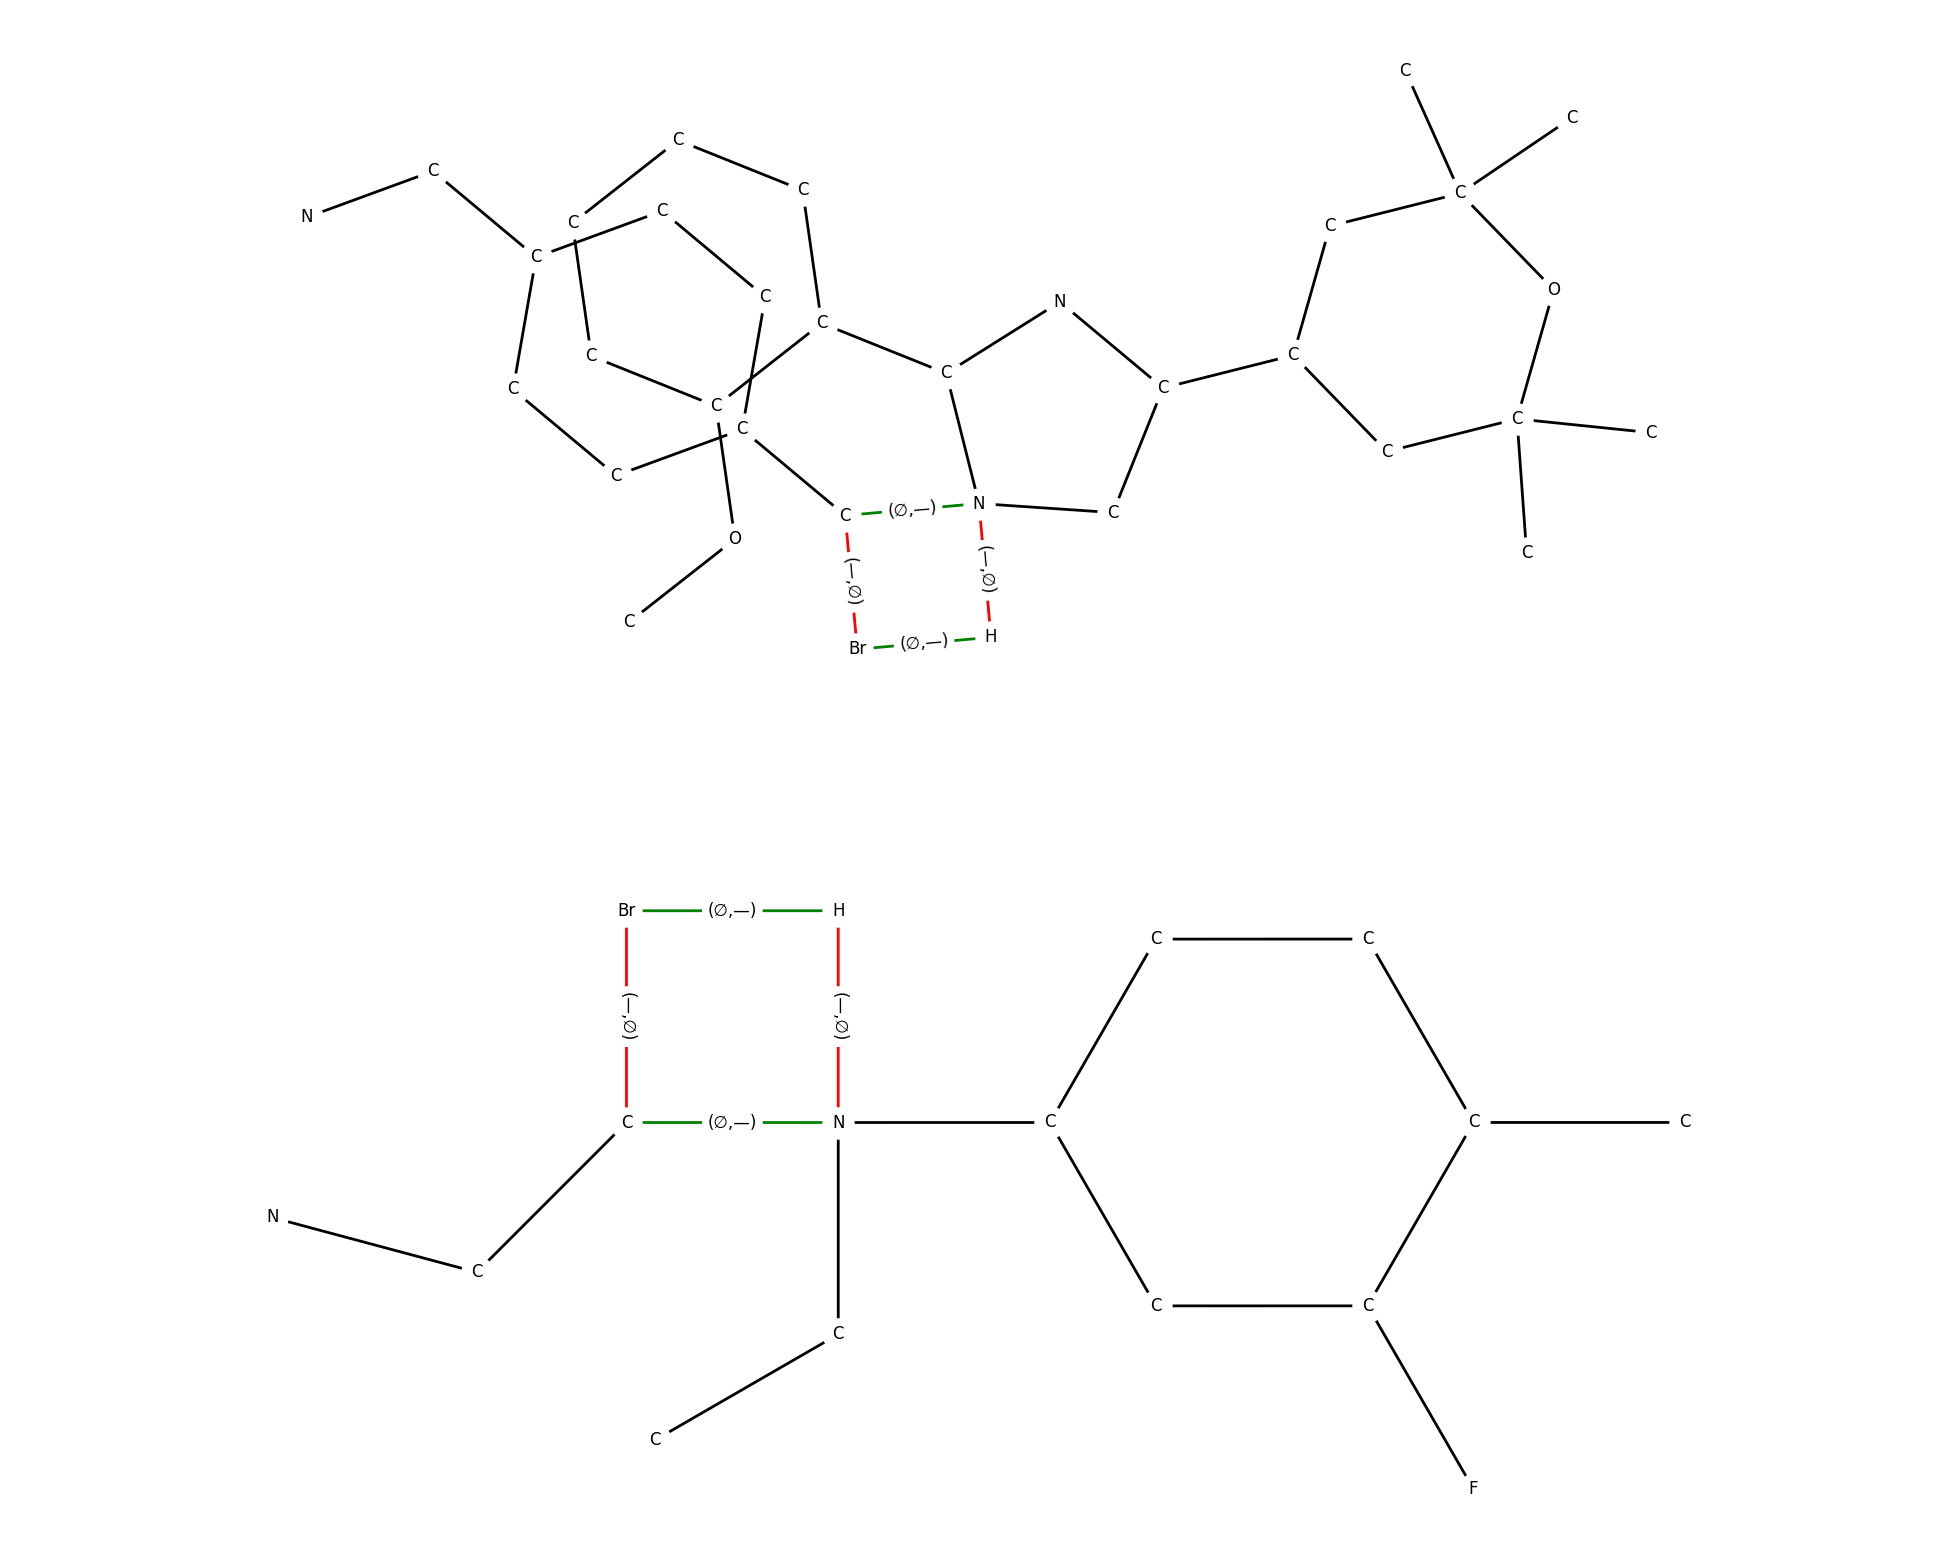

In [67]:
from synutility.SynVis.graph_visualizer import GraphVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize = (25, 20 ))
vis = GraphVisualizer ()

vis.plot_its(current_partition[1], ax[0], use_edge_color=True)
vis.plot_its(current_partition[2], ax[1], use_edge_color=True)